In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [70]:
df=pd.read_csv('College.csv', index_col=0)
print(df.head())

                             Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Ch

In [71]:
print(df.describe())

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

In [72]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [73]:
#change object to int: use dictionary or the following
def converter(Private):
    if Private=='Yes':
        return 1
    else:
        return 0

In [74]:
df['Private']=df['Private'].apply(converter)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


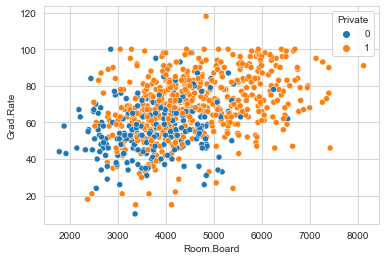

In [75]:
sns.set_style('whitegrid')
sns.scatterplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private')

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


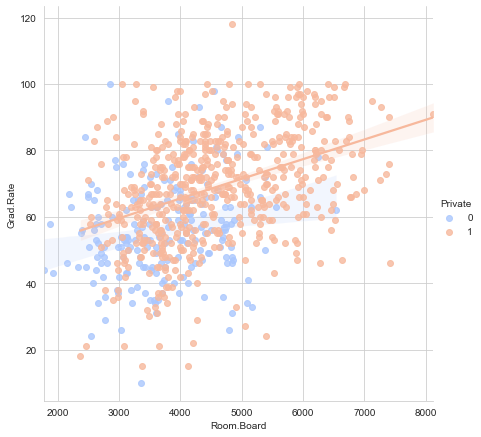

In [76]:
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private', palette='coolwarm', size=6, aspect=1)


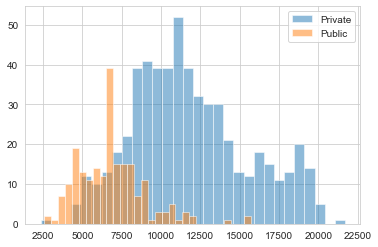

In [77]:

df[df['Private']==1]['Outstate'].hist( alpha=0.5, label='Private', bins=30)
df[df['Private']==0]['Outstate'].hist( alpha=0.5, label='Public', bins=30)
plt.legend()

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


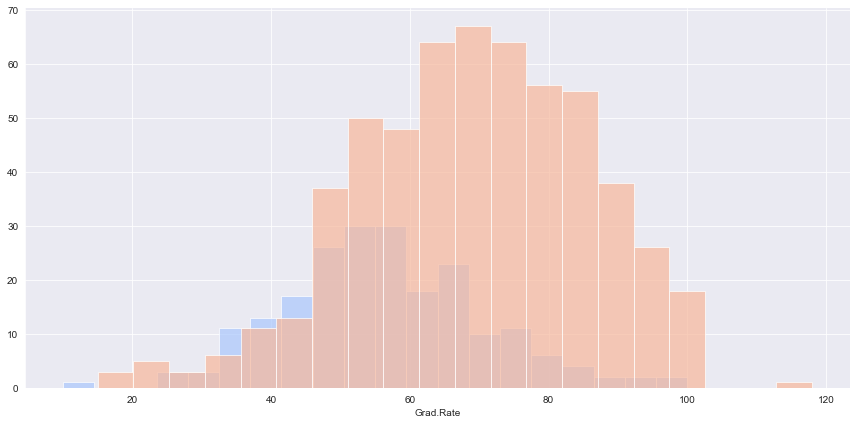

In [78]:
sns.set_style('darkgrid')

sns.FacetGrid(df, hue='Private', palette='coolwarm',size=6, aspect=2).map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)
#one data larger than 100

In [79]:
print(print(df[df['Grad.Rate']>100])) #so change the data

                   Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
Cazenovia College        1  3847    3433     527          9         35   

                   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
Cazenovia College         1010           12      9384        4840    600   

                   Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  \
Cazenovia College       500   22        47       14.3           20    7697   

                   Grad.Rate  
Cazenovia College        118  
None


In [80]:
df['Grad.Rate']['Cazenovia College']=100
print(print(df[df['Grad.Rate']>100]))


Empty DataFrame
Columns: [Private, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []
None


c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
features=df.drop('Private', axis=1)

## Normalized

In [82]:
sc = StandardScaler()
features=sc.fit(features).transform(features)


In [83]:
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)
k_means.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
k_means_labels = k_means.labels_
print(k_means_labels)

[0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 

In [85]:
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[[-0.32661962 -0.30530339 -0.25143507 -0.49913749 -0.50267293 -0.22105053
  -0.03848678 -0.45792911 -0.37283453 -0.12172587  0.04875211 -0.49062908
  -0.47906195  0.23583839 -0.30713916 -0.42464126 -0.36177249]
 [ 0.54548844  0.50988814  0.41992248  0.83361106  0.83951561  0.36917718
   0.06427689  0.76478882  0.6226721   0.20329475 -0.08142105  0.81940114
   0.80008284 -0.39387442  0.51295406  0.70919469  0.60419735]]


# Evaluation
we do not usually have label for clustering, but we have now, so we have evaluation

In [86]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [87]:
df['Cluster'] = df['Private'].apply(converter)

In [88]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [89]:
print(classification_report(df['Private'], k_means_labels))
print(confusion_matrix(df['Private'], k_means_labels))

              precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777

[[146  66]
 [340 225]]


In [90]:
print(classification_report(df['Cluster'], k_means_labels))
print(confusion_matrix(df['Cluster'], k_means_labels))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77       777
           1       0.00      0.00      0.00         0

    accuracy                           0.63       777
   macro avg       0.50      0.31      0.38       777
weighted avg       1.00      0.63      0.77       777

[[486 291]
 [  0   0]]


c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
